In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics

In [37]:
iris = load_iris()
X = iris.data[:,2:] #długość i szerokość płaltka
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X, y)

#macierz pomyłek
confusion_matrix = metrics.confusion_matrix(y, prediction)
print(confusion_matrix)
print()

#skuteczność algorytmu
accuracy = metrics.accuracy_score(y, prediction)
print(accuracy)
print()

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

0.9733333333333334



In [19]:
#wizualizacja drzewa
from sklearn.tree import export_graphviz
import graphviz

data = export_graphviz(
    tree_clf,
    out_file = None,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

graph = graphviz.Source(data)

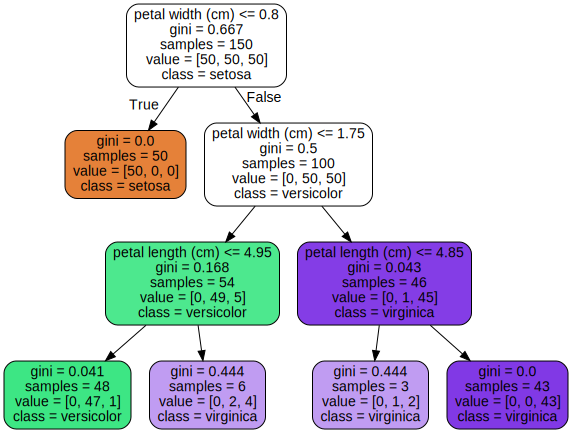

In [20]:
graph